In [45]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colormaps
%matplotlib inline

In [29]:
years = range(2006, 2022)
yearly_data = []
for year in years:
    d = pd.read_table(f"ped_factors_usa_{year:d}.txt")
    d = d.drop(columns="Unnamed: 3")
    d["Year"] = year
    yearly_data.append(d)

In [30]:
all_data = pd.concat(yearly_data, ignore_index=True)

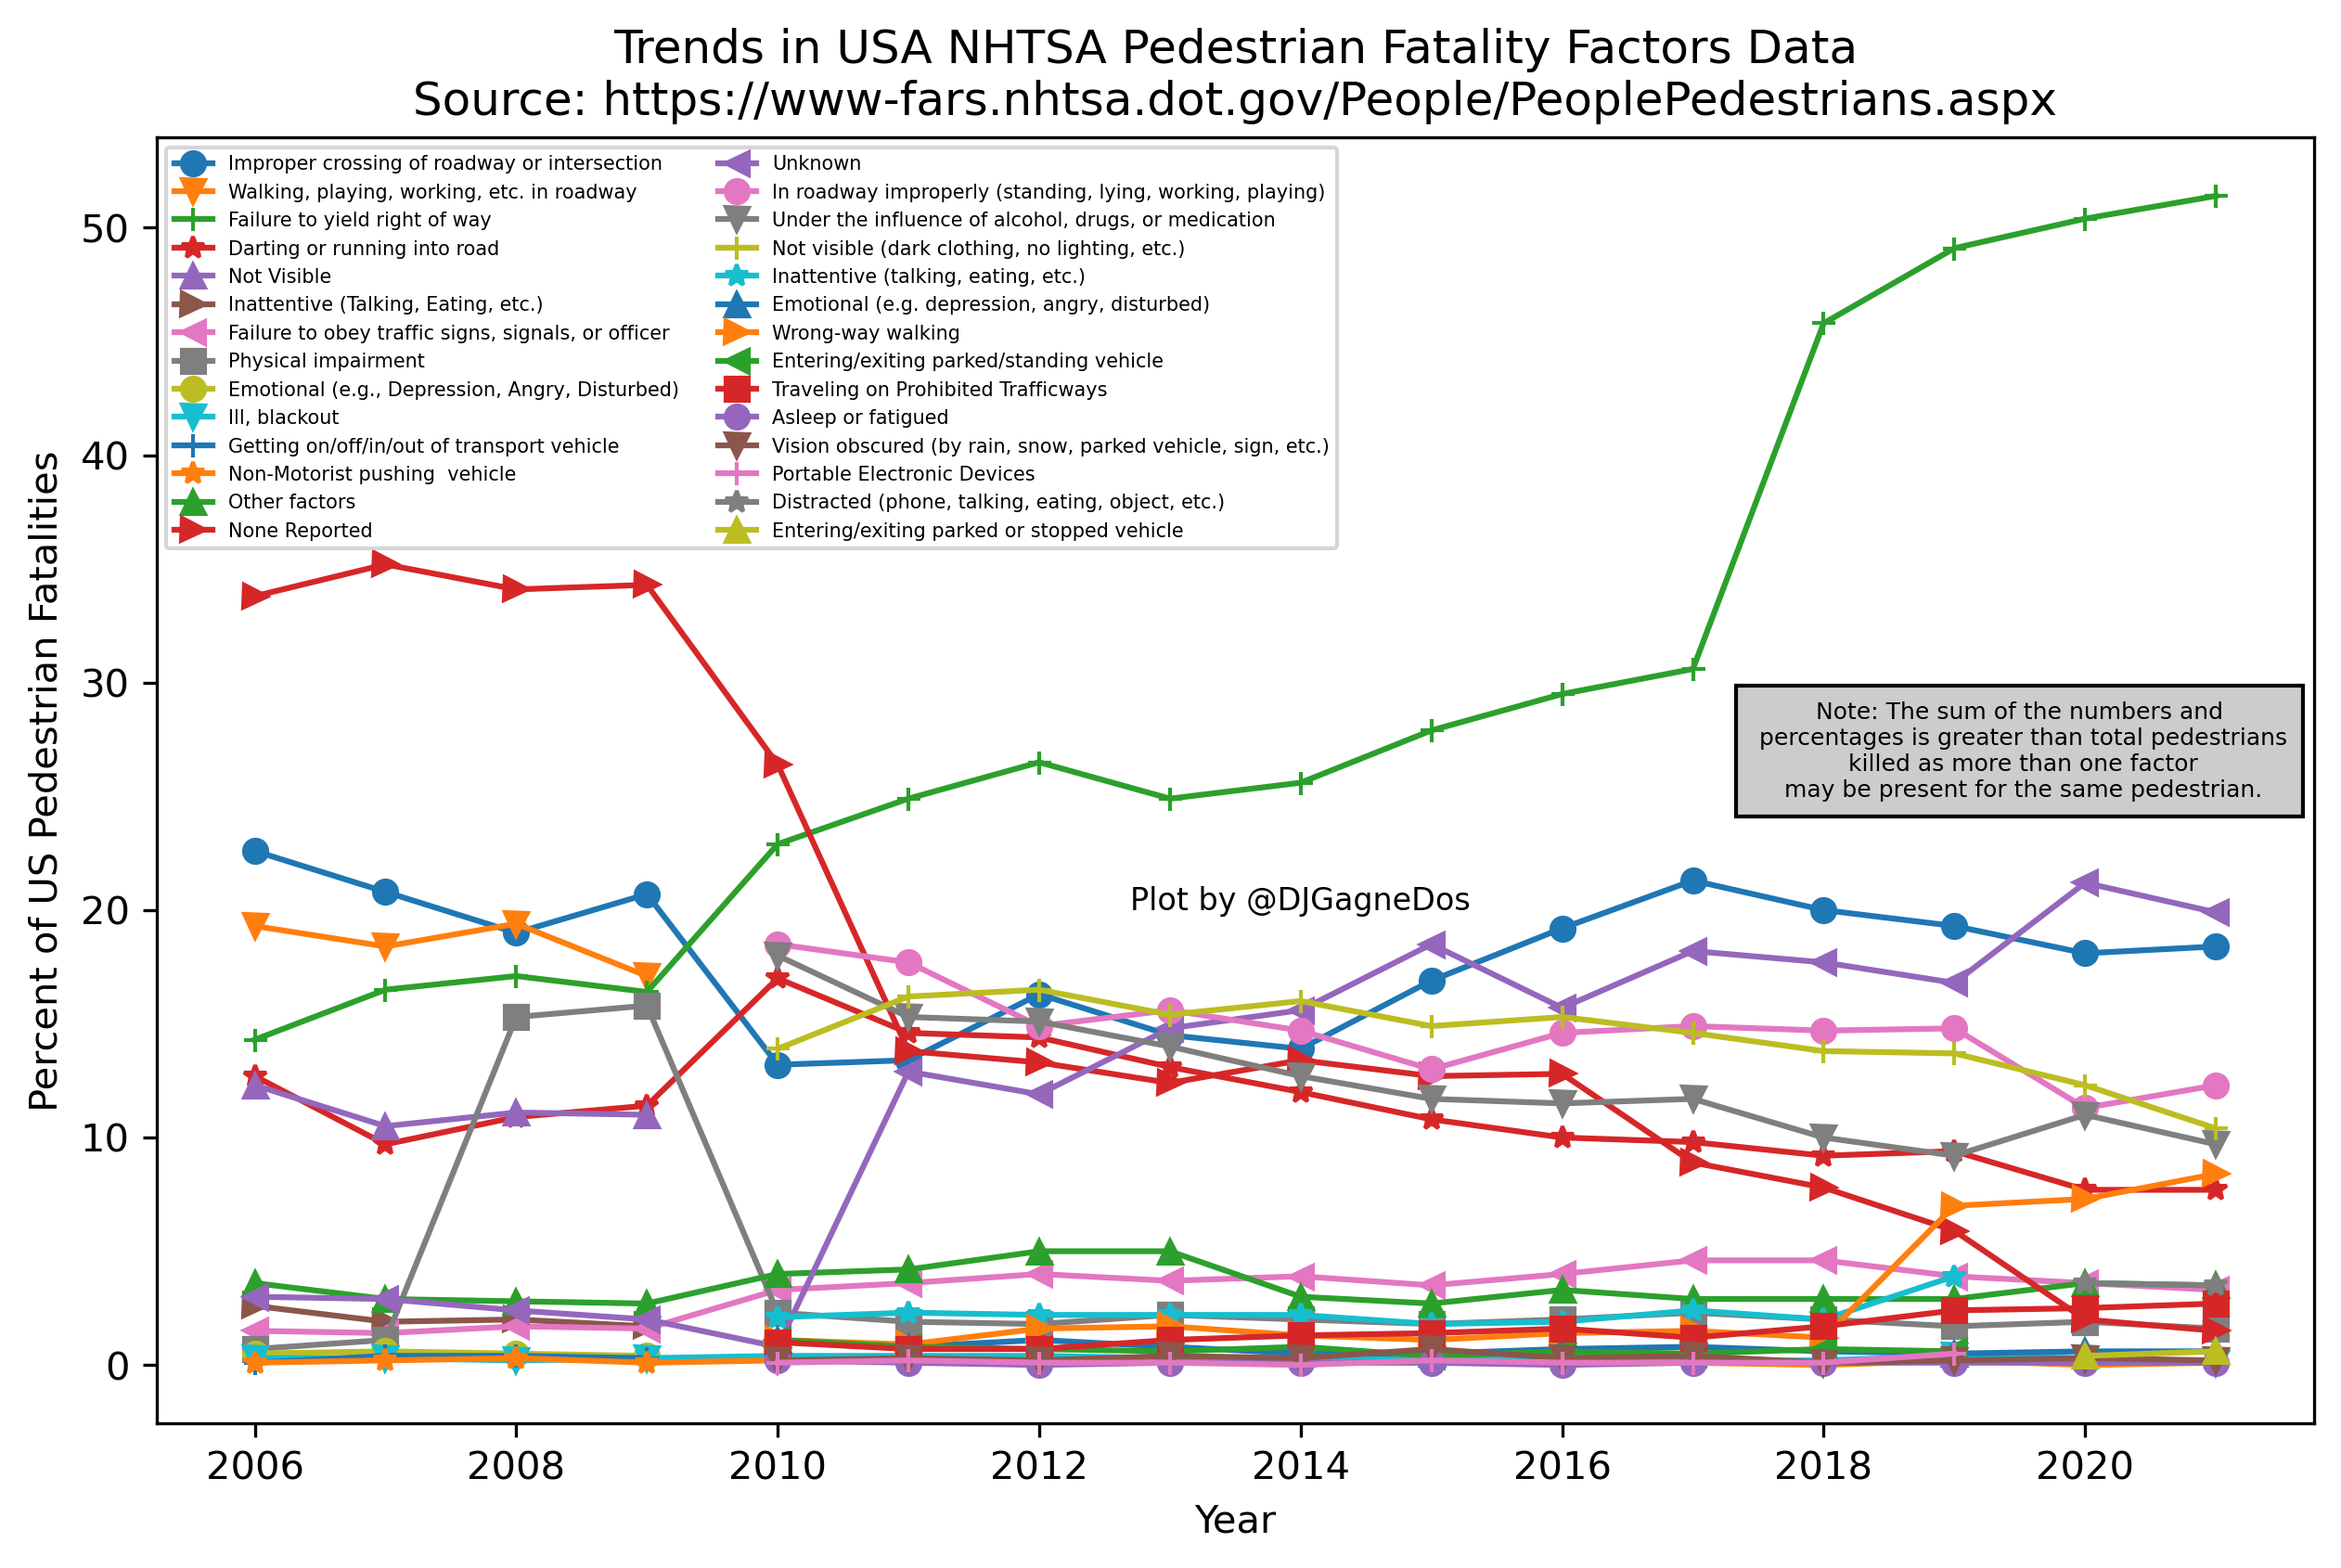

In [71]:
note_text = "Note: The sum of the numbers and\n percentages is greater than total pedestrians\n killed as more than one factor\n may be present for the same pedestrian."

plt.figure(figsize=(10, 6), dpi=300)
markers = ['o', 'v', '+', '*', '^', '>', '<', 's']
factors = all_data["Factors"].unique()
cmap = colormaps["tab10"].resampled(10)
for f, factor in enumerate(factors):
    if factor != "Total":
        subset = all_data.loc[all_data["Factors"] == factor]
        
        plt.plot(subset["Year"], subset["Percent"], label=factor, marker=markers[f%len(markers)],
                 color=cmap(f%10))
plt.legend(fontsize=5, ncol=2)
plt.ylabel("Percent of US Pedestrian Fatalities")
plt.xlabel("Year")
plt.title("Trends in USA NHTSA Pedestrian Fatality Factors Data\nSource: https://www-fars.nhtsa.dot.gov/People/PeoplePedestrians.aspx")
plt.text(2014, 20, "Plot by @DJGagneDos", ha="center", fontsize=8)
plt.text(2019.5, 25, note_text, fontsize=6, ha="center", bbox=dict(fc="0.8"))
plt.savefig("trends_in_fatality_factors_percent.png", dpi=300, bbox_inches="tight")

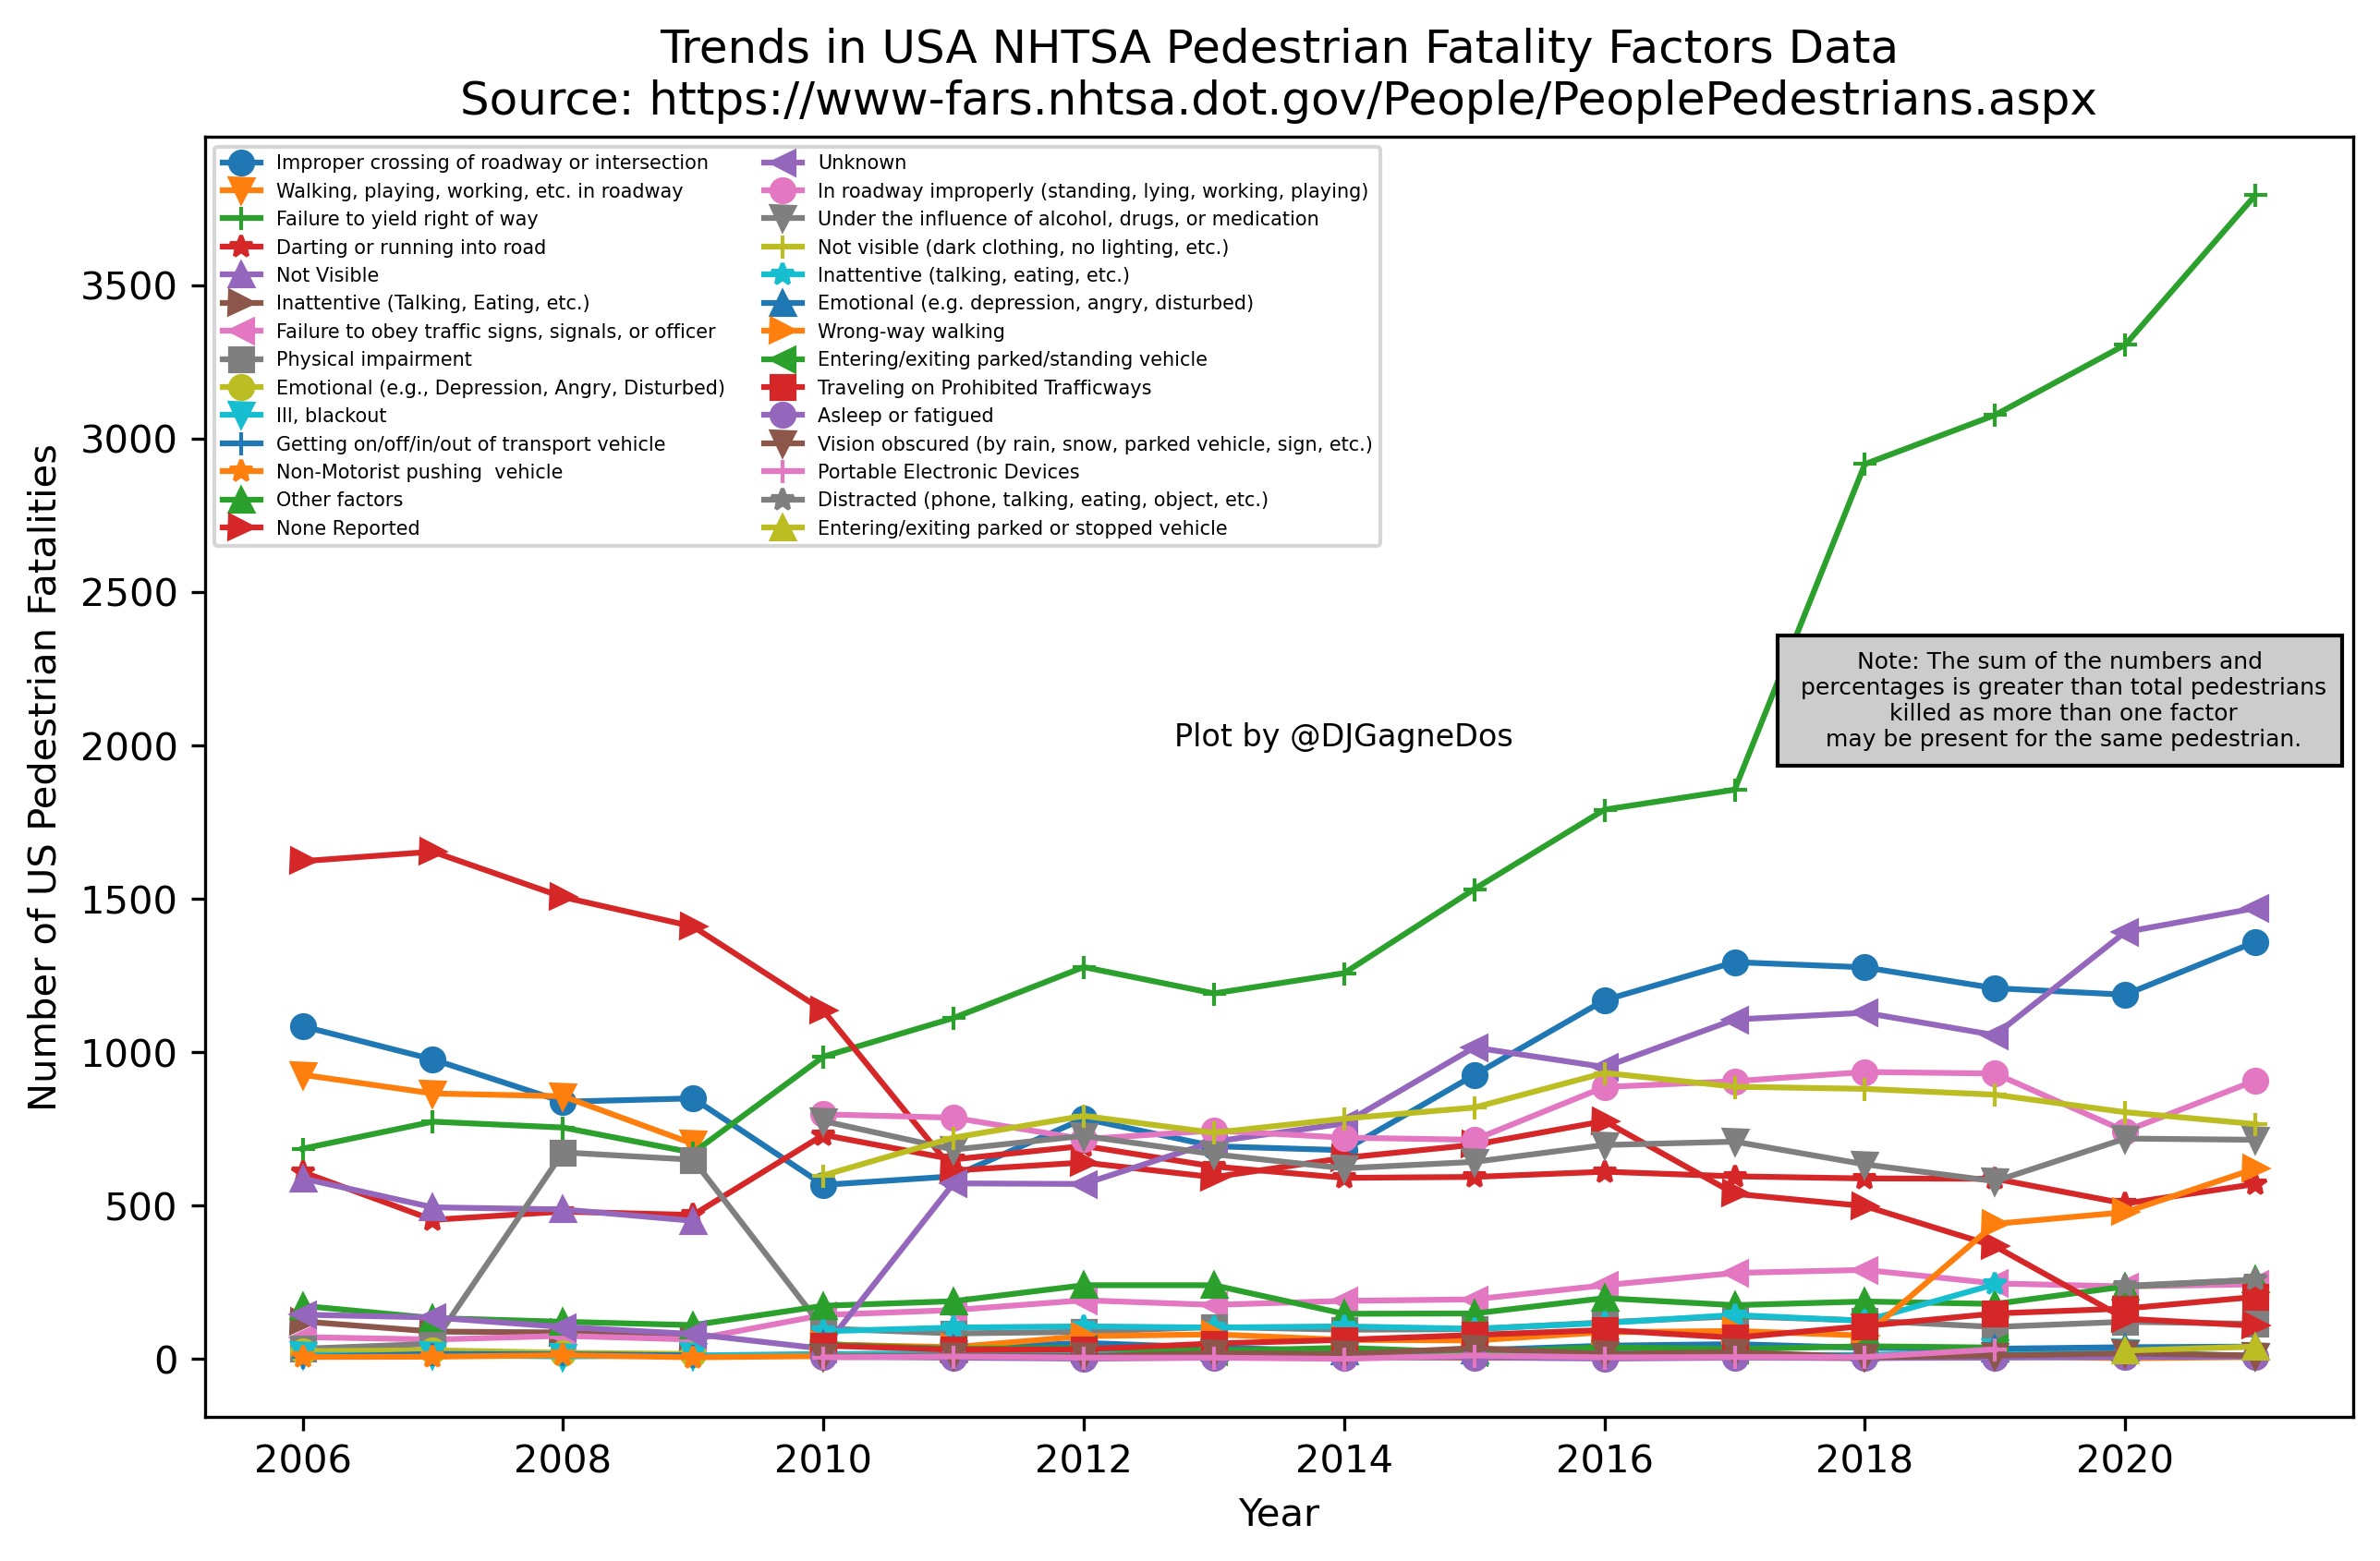

In [101]:
note_text = "Note: The sum of the numbers and\n percentages is greater than total pedestrians\n killed as more than one factor\n may be present for the same pedestrian."

plt.figure(figsize=(10, 6), dpi=300)
markers = ['o', 'v', '+', '*', '^', '>', '<', 's']
factors = all_data["Factors"].unique()
cmap = colormaps["tab10"].resampled(10)
for f, factor in enumerate(factors):
    if factor != "Total":
        subset = all_data.loc[all_data["Factors"] == factor]
        
        plt.plot(subset["Year"], subset["Number"], label=factor, marker=markers[f%len(markers)],
                 color=cmap(f%10))
plt.legend(fontsize=5, ncol=2)
plt.ylabel("Number of US Pedestrian Fatalities")
plt.xlabel("Year")
plt.title("Trends in USA NHTSA Pedestrian Fatality Factors Data\nSource: https://www-fars.nhtsa.dot.gov/People/PeoplePedestrians.aspx")
plt.text(2014, 2000, "Plot by @DJGagneDos", ha="center", fontsize=8)
plt.text(2019.5, 2000, note_text, fontsize=6, ha="center", bbox=dict(fc="0.8"))
plt.xlabel("Year")

plt.savefig("trends_in_fatality_factors_number.png", dpi=300, bbox_inches="tight")

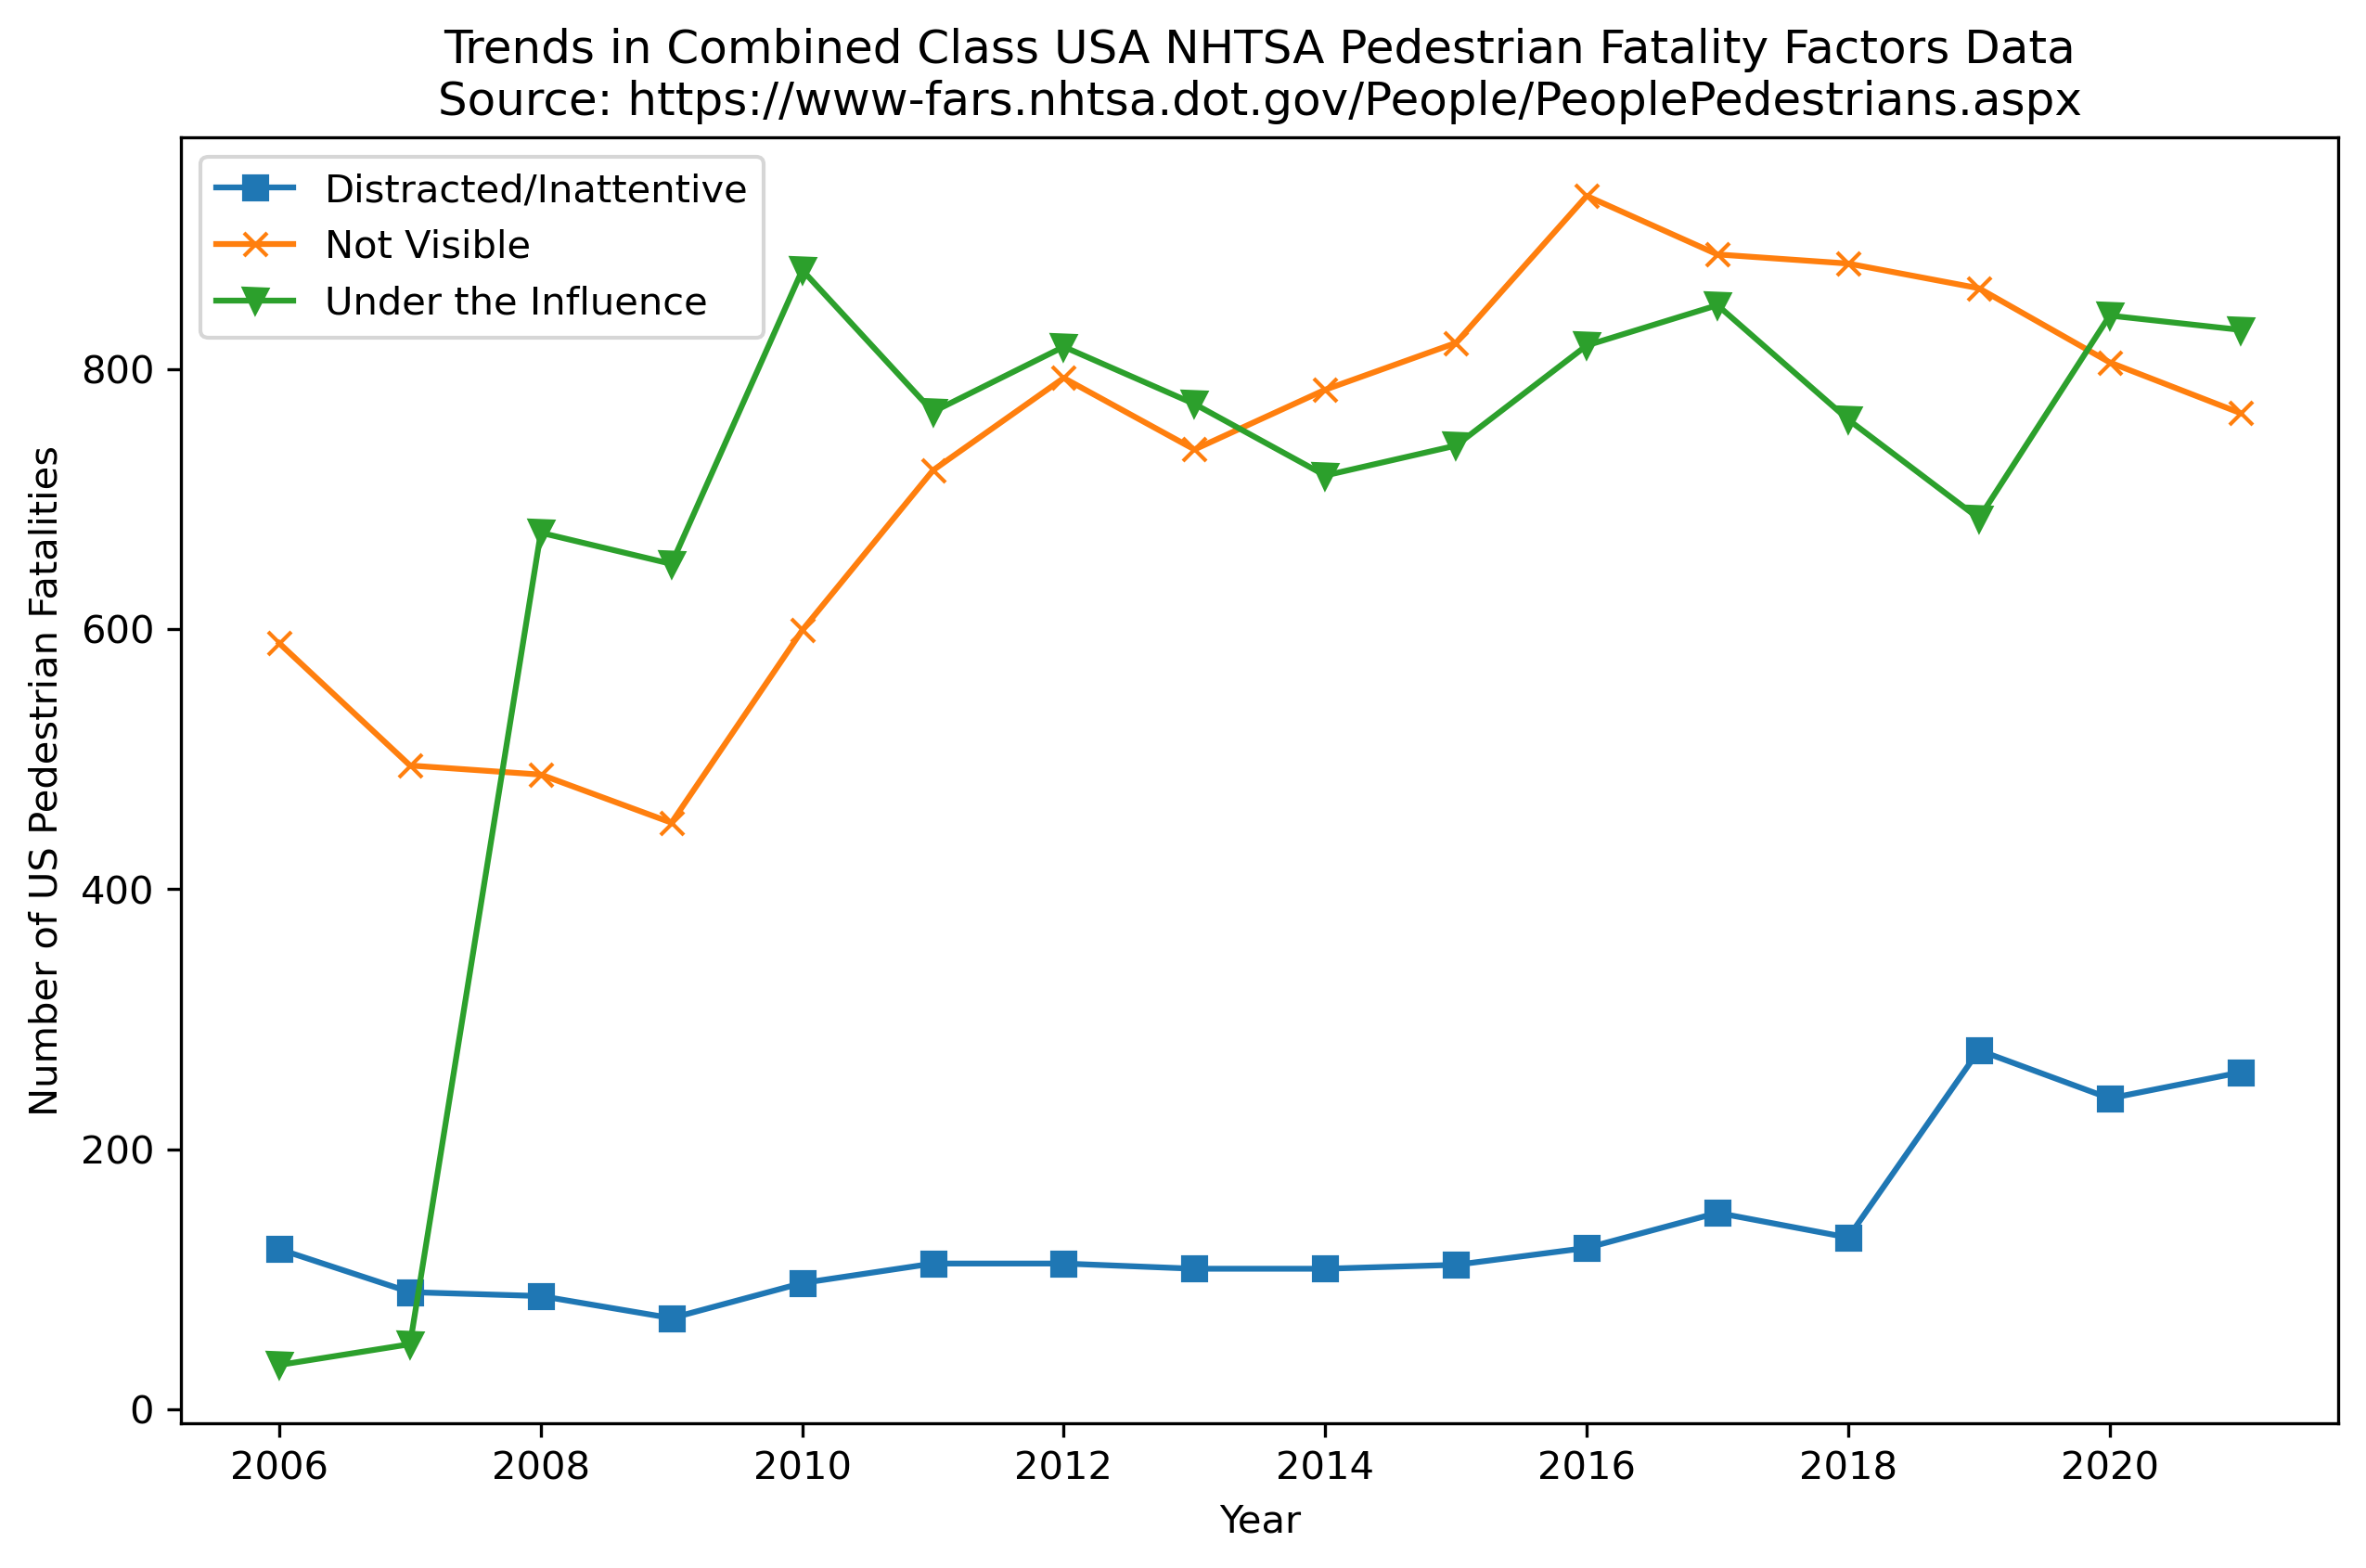

In [104]:
plt.figure(figsize=(10, 6), dpi=300)
sub_factors = ['Inattentive (Talking, Eating, etc.)',
               'Distracted (phone, talking, eating, object, etc.)', 
               'Inattentive (talking, eating, etc.)',
               'Portable Electronic Devices']
subset = all_data.loc[all_data["Factors"].isin(sub_factors)].groupby("Year").sum()            
plt.plot(subset.index, subset["Number"], marker='s', label="Distracted/Inattentive")

sub_factors = ['Not Visible', 'Not visible (dark clothing, no lighting, etc.)']
subset = all_data.loc[all_data["Factors"].isin(sub_factors)].groupby("Year").sum()            
plt.plot(subset.index, subset["Number"], marker='x', label="Not Visible")
plt.ylabel("Number of US Pedestrian Fatalities")
plt.xlabel("Year")
sub_factors = ['Physical impairment', 'Under the influence of alcohol, drugs, or medication']
subset = all_data.loc[all_data["Factors"].isin(sub_factors)].groupby("Year").sum()            
plt.plot(subset.index, subset["Number"], marker='v', label="Under the Influence")
plt.legend()
plt.title("Trends in Combined Class USA NHTSA Pedestrian Fatality Factors Data\nSource: https://www-fars.nhtsa.dot.gov/People/PeoplePedestrians.aspx")
plt.savefig("combined_trends_in_fatality_factors_number.png", dpi=300, bbox_inches="tight")

In [97]:
yearly_data[0]

,Factors,Number,Percent,Year
0,Improper crossing of roadway or intersection,1085,22.6,2006
1,"Walking, playing, working, etc. in roadway",927,19.3,2006
2,Failure to yield right of way,686,14.3,2006
3,Darting or running into road,610,12.7,2006
4,Not Visible,589,12.3,2006
5,"Inattentive (Talking, Eating, etc.)",123,2.6,2006
6,"Failure to obey traffic signs, signals, or off...",72,1.5,2006
7,Physical impairment,34,0.7,2006
8,"Emotional (e.g., Depression, Angry, Disturbed)",26,0.5,2006
9,"Ill, blackout",14,0.3,2006


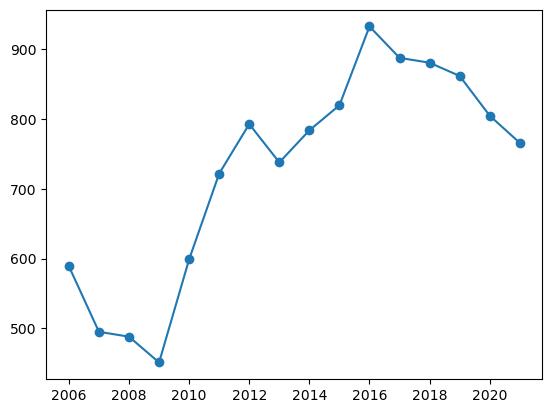

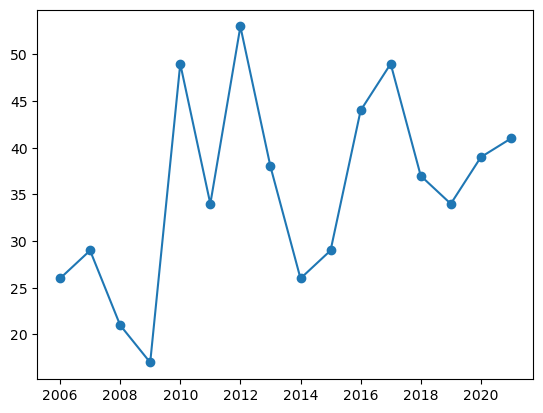

In [91]:
sub_factors = ['Emotional (e.g., Depression, Angry, Disturbed)', 'Emotional (e.g. depression, angry, disturbed)']
subset = all_data.loc[all_data["Factors"].isin(sub_factors)].groupby("Year").sum()            
            
plt.plot(subset.index, subset["Number"], marker='o')